# What is pruning ?

In general pruning is a process of removal of selected part of plant such as bud,branches and roots . In Decision Tree pruning does the same task it removes the branchesof decision tree to overcome the overfitting condition of decision tree. This can be done in two ways, we will discuss both the techniques in detail. let’s get started……….

# Post Pruning :

This technique is used after construction of decision tree. <br>
This technique is used when decision tree will have very large depth and will show overfitting of model.<br>

It is also known as backward pruning.<br>
This technique is used when we have infinitely grown decision tree.<br>
Here we will control the branches of decision tree that is `max_depth` and `min_samples_split` `using cost_complexity_pruning`<br>

事後修剪是在決策樹完全生成後進行的。這種方法涉及刪減樹的某些部分以改善模型的泛化能力。主要的修剪技術包括：

- 子樹置換 (Subtree Replacement): 這種方法涉及將一個完整的子樹替換為單個節點（通常是該子樹的葉節點），基於該子樹的整體性能不如單個節點。
- 子樹提升 (Subtree Raising): 這種方法將一個子樹的根節點用其下的某個內部節點或葉節點替代，這通常用於複雜的修剪情境並且可能比子樹置換更耗時。
- 成本複雜度修剪 (Cost Complexity Pruning): 這是CART樹算法中使用的一種方法，它考慮到樹的葉節點數量和錯誤率，尋找最佳的樹大小以平衡這兩者。
- 悲觀修剪 (Pessimistic Pruning): C4.5算法採用的修剪技術，基於錯誤率的增加來決定是否進行修剪，通常對樹的預測性能持悲觀態度。


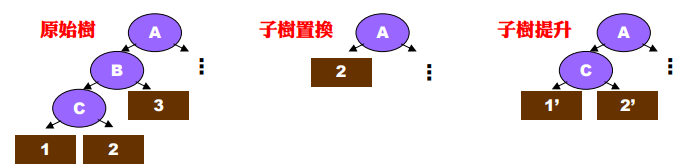

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

## load_breast_cancer

In [58]:
dta = datasets.load_breast_cancer()

data = np.column_stack((dta.data, dta.target))
feature_name = np.concatenate((dta.feature_names, ["target"]), axis=0)

print(dta.target_names)

df = pd.DataFrame(data, columns=feature_name); df.head()


['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [59]:
X,y=datasets.load_breast_cancer(return_X_y=True)

X


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

## Train model

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

clf=DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

y_train_predicted=clf.predict(X_train)
y_test_predicted=clf.predict(X_test)

print("Train accuracy: ",accuracy_score(y_train,y_train_predicted))
print("Test accuracy: ",accuracy_score(y_test,y_test_predicted))



Train accuracy:  1.0
Test accuracy:  0.8811188811188811


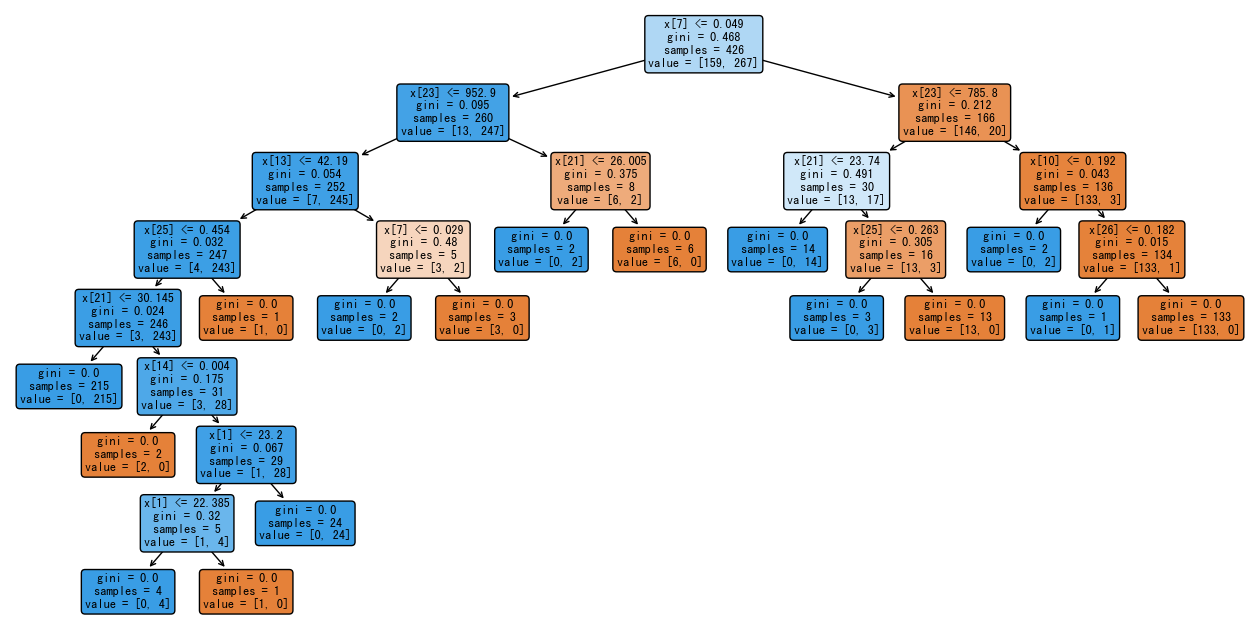

In [61]:
plt.figure(figsize=(16,8))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

## Modeling without Post-Pruning

In [62]:
path=clf.cost_complexity_pruning_path(X_train,y_train)

#path variable gives two things ccp_alphas and impurities
ccp_alphas = path.ccp_alphas
impurities = path.impurities

print("ccp alpha wil give list of values :", ccp_alphas)
print("***********************************************************")
print("Impurities in Decision Tree :", impurities)

ccp alpha wil give list of values : [0.         0.00226647 0.00464743 0.0046598  0.0056338  0.00704225
 0.00784194 0.00911402 0.01144366 0.018988   0.02314163 0.03422475
 0.32729844]
***********************************************************
Impurities in Decision Tree : [0.         0.00453294 0.01847522 0.02313502 0.02876883 0.03581108
 0.04365302 0.05276704 0.0642107  0.0831987  0.10634033 0.14056508
 0.46786352]




## 成本複雜度修剪 (Cost Complexity Pruning)
### 控制決策樹修剪的程度。α (ccp_alphas) 越大，允許的不純度增加越少，修剪越嚴格。
成本複雜度修剪，也稱作最小成本複雜度修剪，是一種用於減少決策樹過度擬合並提升其泛化能力的技術。這種方法透過引入一個稱為 $\alpha$ 的參數來平衡樹的大小與其性能。

### 原理

成本複雜度修剪通過使用成本複雜度函數 $R_\alpha(T)$ 來控制修剪程度，這個函數定義為：

$$
R_\alpha(T) = R(T) + \alpha \times |\text{leaves}|
$$

其中：

- $R(T)$ 是未修剪樹 $T$ 的誤差。
- $|\text{leaves}|$ 是樹 $T$ 中葉節點的數量。
- $\alpha$ 是控制模型複雜度和訓練誤差間權衡的非負參數。

### 剪枝步驟

1. **生成完全樹**：首先建立一個最大程度地擬合訓練數據的完全決策樹。
2. **計算 $\alpha$ 值**：為樹的每一個可能的子樹計算 $\alpha$ 值，這些值代表從該子樹移除一個節點所對應的不純度增加的程度。
3. **樹序列生成**：通過逐步增加 $\alpha$ 的值，生成一系列越來越簡單的樹。
4. **選擇最優樹**：最後，選擇在交叉驗證或獨立測試集上表現最佳的樹作為最終模型。

### 優點

- **防止過擬合**：透過修剪掉對最終預測貢獻不大的節點，有助於減少模型的過擬合。
- **提升模型泛化能力**：簡化的樹結構通常對未見數據有更好的預測能力。
- **靈活控制**：通過調整 $\alpha$ 值，用戶可以靈活控制模型的複雜度和性能之間的權衡。




In [74]:
ccp_alphas = ccp_alphas[:-1]
impurities = impurities[:-1]

In [75]:
clfs=[]   #will store all the models here

for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)

print(f"Last node in Decision tree is {clfs[-1].tree_.node_count} and ccp_alpha for last node is {ccp_alphas[-1]}")

Last node in Decision tree is 3 and ccp_alpha for last node is 0.03422474765119576


In [64]:
clfs

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0022664723976040134, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004647426339100881, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004659799593581376, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.005633802816901408, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007042253521126761, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007841938420144537, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.009114019793328328, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.011443661971830986, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.018988002086593604, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.023141627543035996, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.03422474765119576, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.3272984419327777, random_state=0)]

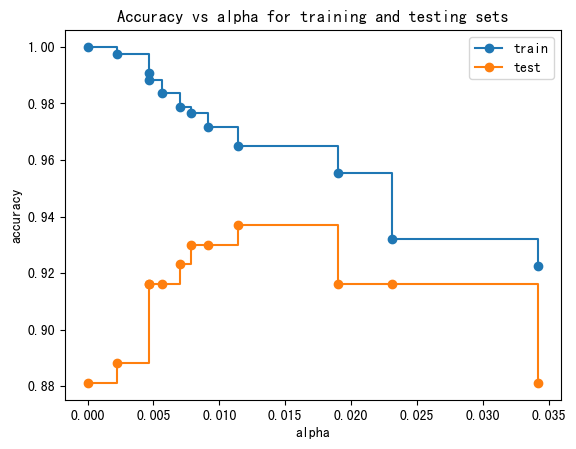

In [76]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]


fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")

ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()


plt.show()



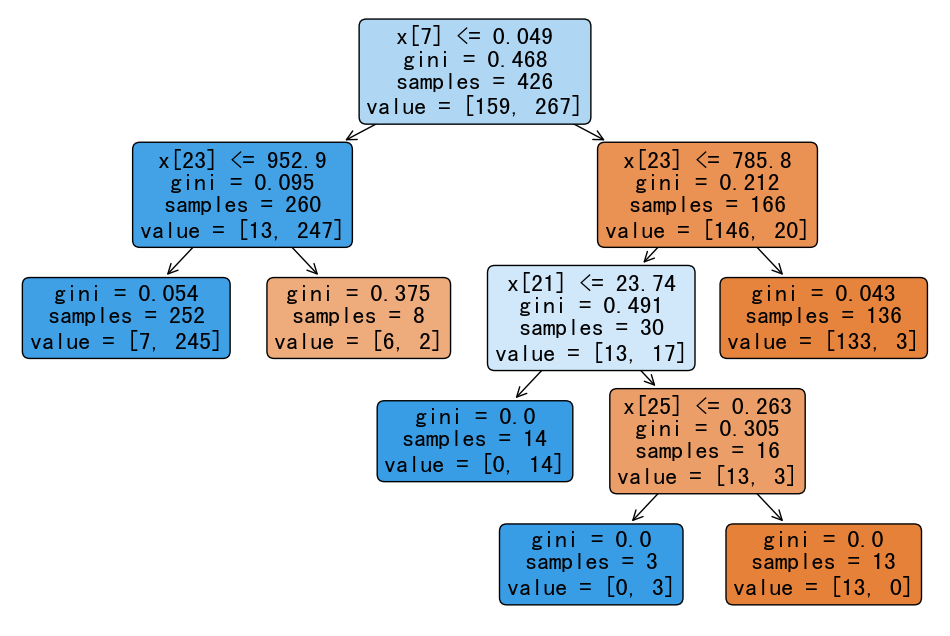

In [78]:
clf=DecisionTreeClassifier(random_state=0, ccp_alpha=0.01)
clf.fit(X_train,y_train)
plt.figure(figsize=(12,8))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [67]:
accuracy_score(y_test,clf.predict(X_test))

0.916083916083916



# decision tree 中的可調參數

[sklearn decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

- criterion: string, optional (default=”gini”): : 衡量分割品質的函數。支援的標準有"Gini 不純度"和"信息增益"
- splitter: string, optional (default=”best”)
- max_depth: int or None, optional (default=None)
- min_samples_split: int, float, optional (default=2)

## criterion

衡量分割品質的函數。支援的標準有"Gini 不純度"和"信息增益"。預設是"gini"。

如果你曾經想過決策樹節點是如何分割的，那就是使用不純度。不純度是衡量節點上標籤同質性的指標。有許多方法可以實現不純度的衡量，scikit-learn 實現了信息增益和 Gini 不純度或 Gini 指數的兩種方法。


根據論文[《基尼指數和信息增益準則的理論比較》](https://www.unine.ch/files/live/sites/imi/files/shared/documents/papers/Gini_index_fulltext.pdf)研究指出，基尼指數和信息增益的一致性/不一致性頻率僅為所有情況的 2％，因此在實際上您可以使用其中任何一個，唯一的區別是熵可能稍微慢一些，因為它需要計算對數函數：

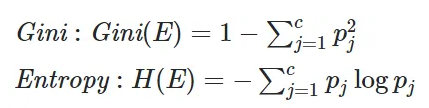

## splitter

用於選擇每個節點的分割策略。支持的策略有“best”表示選擇最佳分割，“random”表示選擇隨機分割。默認為“best”。

假設你有數百個特徵，那麼「最佳」的分割器是理想的，因為它會根據不純度度量計算最佳特徵進行分割，而如果你選擇「隨機」，你很有可能得到不提供太多信息的特徵，這將導致更深、不太精確的樹。

另一方面，「隨機」分割器具有一些優勢，特別是因為它隨機選擇一組特徵進行分割，所以不需要計算最佳分割的計算負擔。此外，它也不容易過度擬合，因為你不是在每次分割之前計算最佳分割，額外的隨機性將對你有所幫助，所以如果你的模型過度擬合，你可以將分割器更改為「隨機」並重新訓練。

## max_depth (pre pruning)

`max_depth` specifies the maximum depth of the tree

一般來說，您允許樹生長得越深，模型就會變得越複雜，因為您會有更多的分割點，並且它能夠捕捉更多關於數據的信息，這是決策樹過度擬合的根本原因之一，因為您的模型對於訓練數據完美擬合，但在測試集上無法很好地泛化。因此，如果您的模型過度擬合，減少 max_depth 是一種對抗過度擬合的方法。

同樣，深度過低也是不好的，因為您的模型會出現欠擬合的情況，所以如何找到最佳值，需要進行實驗，因為過度擬合和欠擬合對於數據集來說是非常主觀的，沒有一個值適用於所有情況的解決方案。所以我通常的做法是，讓模型先決定 max_depth，然後通過比較訓練和測試分數來檢查過度擬合或欠擬合的情況，根據程度減少或增加 max_depth。



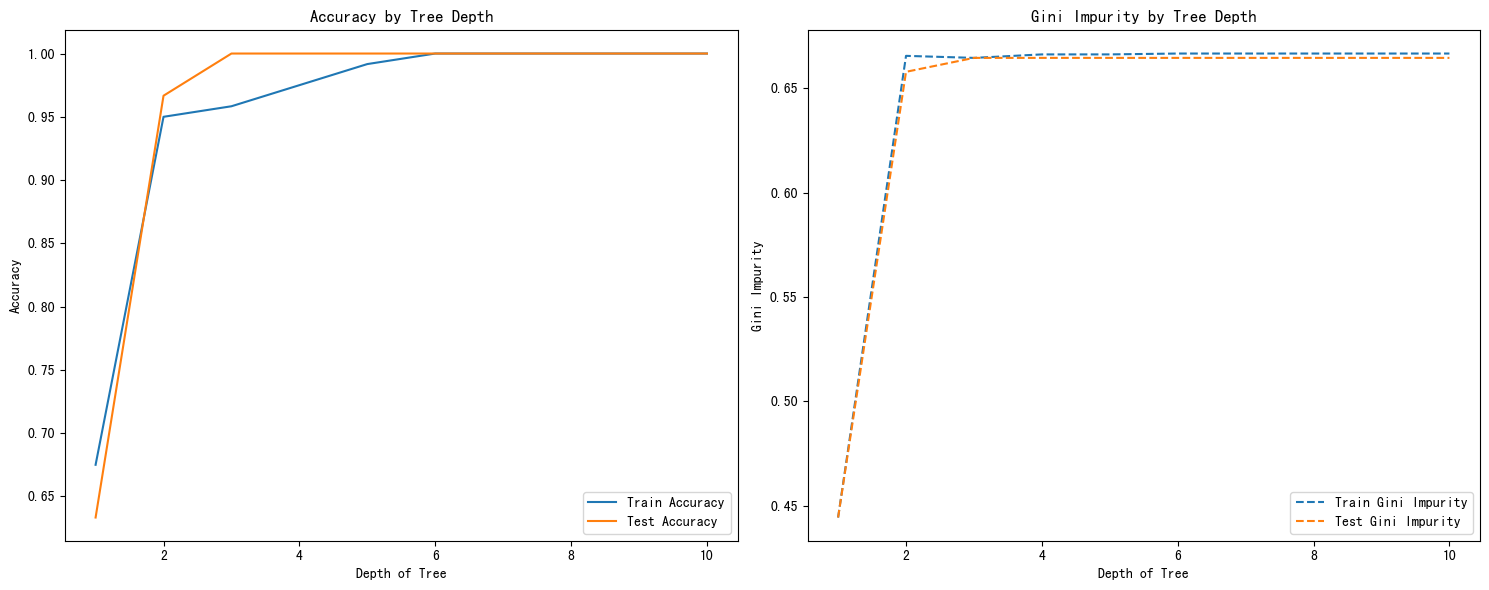

In [21]:
from sklearn.datasets import make_classification

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Range of depths to evaluate
depths = range(1, 11)
train_accuracies = []
test_accuracies = []

# Evaluate the decision tree classifier at various depths using Gini impurity
train_ginis = []
test_ginis = []

for depth in depths:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculate accuracy for train and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Calculate Gini impurity for train and test sets
    # We calculate it as sum(p * (1-p)) over all classes, where p is the proportion of class labels in the node
    train_classes, train_counts = np.unique(y_train_pred, return_counts=True)
    test_classes, test_counts = np.unique(y_test_pred, return_counts=True)
    
    train_gini = 1 - sum((count/len(y_train_pred))**2 for count in train_counts)
    test_gini = 1 - sum((count/len(y_test_pred))**2 for count in test_counts)
    
    train_ginis.append(train_gini)
    test_ginis.append(test_gini)

# Plotting the results using subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Accuracy subplot
axes[0].plot(depths, train_accuracies, label='Train Accuracy')
axes[0].plot(depths, test_accuracies, label='Test Accuracy')
axes[0].set_xlabel('Depth of Tree')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy by Tree Depth')
axes[0].legend()

# Gini impurity subplot
axes[1].plot(depths, train_ginis, label='Train Gini Impurity', linestyle='--')
axes[1].plot(depths, test_ginis, label='Test Gini Impurity', linestyle='--')
axes[1].set_xlabel('Depth of Tree')
axes[1].set_ylabel('Gini Impurity')
axes[1].set_title('Gini Impurity by Tree Depth')
axes[1].legend()

plt.tight_layout()
plt.show()



## min_samples_split (pre pruning)

分割內部節點所需的最小樣本數。這可以是整數或浮點數。<br>
- 如果是整數，則將min_samples_split作為最小數量。<br>
- 如果是浮點數，如果是浮點數，則 min_samples_split 是一個分數，並且 ceil(min_samples_split * n_samples) 是每個分割所需的最小樣本數。<br>


注意: 假設你指定了一個 min_samples_split，並且結果分割出的葉子節點只有一個樣本，而你指定的 min_samples_leaf 是 2，那麼你的 min_samples_split 將不被允許。


## min_samples_leaf (pre pruning)

1-20 最佳數字

在葉子節點所需的最小樣本數。只有在每個左右分支中至少有 min_samples_leaf 個訓練樣本時，才會考慮任何深度的分割點。這可能會使模型平滑化，特別是在回歸中。<br>

- 如果是 int，則將 min_samples_leaf 視為最小數量。<br>
- 如果是浮點數，則 min_samples_leaf 是一個分數，ceil(min_samples_leaf * n_samples) 是每個節點的最小樣本數。<br>

與 min_samples_split 類似，min_samples_leaf 也用於通過定義每個葉子至少有一個元素來控制過度擬合。從而確保樹不能通過為每個樣本創建一堆小分支來過度擬合訓練數據集。

根據 [An empirical study on hyperparameter tuning of decision trees](https://arxiv.org/abs/1812.02207) 的論文還指出，對於 CART 算法，理想的 min_samples_leaf 值通常在 1 到 20 之間。該論文還指出，min_samples_split 和 min_samples_leaf 在相對重要性分析中對最終樹的性能負責性最大


## class_weight (pre pruning)

以{class_label: weight}形式給出的類別權重。如果未給出，則假定所有類別的權重均為 1。對於多輸出問題，可以按照 y 的列的相同順序提供一個 dict 列表。

當您擁有一個不平衡的數據集時，這非常有用。通常，您可以將類別的分佈作為類別權重的起點，然後根據決策樹的傾向，嘗試增加或減少其他類別的權重，以使算法相對於其他類別的樣本進行懲罰。最簡單的方法是指定“balanced”，然後根據需要使用自定義權重。

---

# Pre-Pruning :
This technique is used before construction of decision tree.<br>
Pre-Pruning can be done using Hyperparameter tuning.<br>
Overcome the overfitting issue.<br>
In this section I will use GridSearchCV for Hyperparameter tuning.<br>
what is Hyperparameter Tuning ?<br>

Lets’ take an example of Decision tree. When we build a DT model we don’t have any idea about which criterion (“gini” or “entropy”) ,what min_depth , what min_samples_split etc will give better model so to break this kind of ambiguity we use hyperparameter tuning in which we take a range of value for each parameters and whichever parameteric value will be best we will feed that particular value into DecisionTreeClassifier() .


### 事前修剪 (Prepruning)
事前修剪是在決策樹完全生成之前介入修剪的過程。這種方法通過設置一個門檻值來控制樹的生長，當某個節點的分裂不再帶來顯著的信息增益或其他統計顯著性（如卡方值、信息增益、吉尼係數等）低於這個預定的門檻時，就停止進一步分裂。這樣可以避免過於複雜的樹結構，但挑選一個恰當的門檻值是一個挑戰，因為過高會導致模型過於簡單，無法捕捉足夠的數據特性；過低則可能使樹過於複雜，容易過擬合。

In [68]:
grid_param={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(2,50,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1) 
            }
grid_search=GridSearchCV(estimator=clf, param_grid=grid_param, cv=5, n_jobs=-1)
grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'}


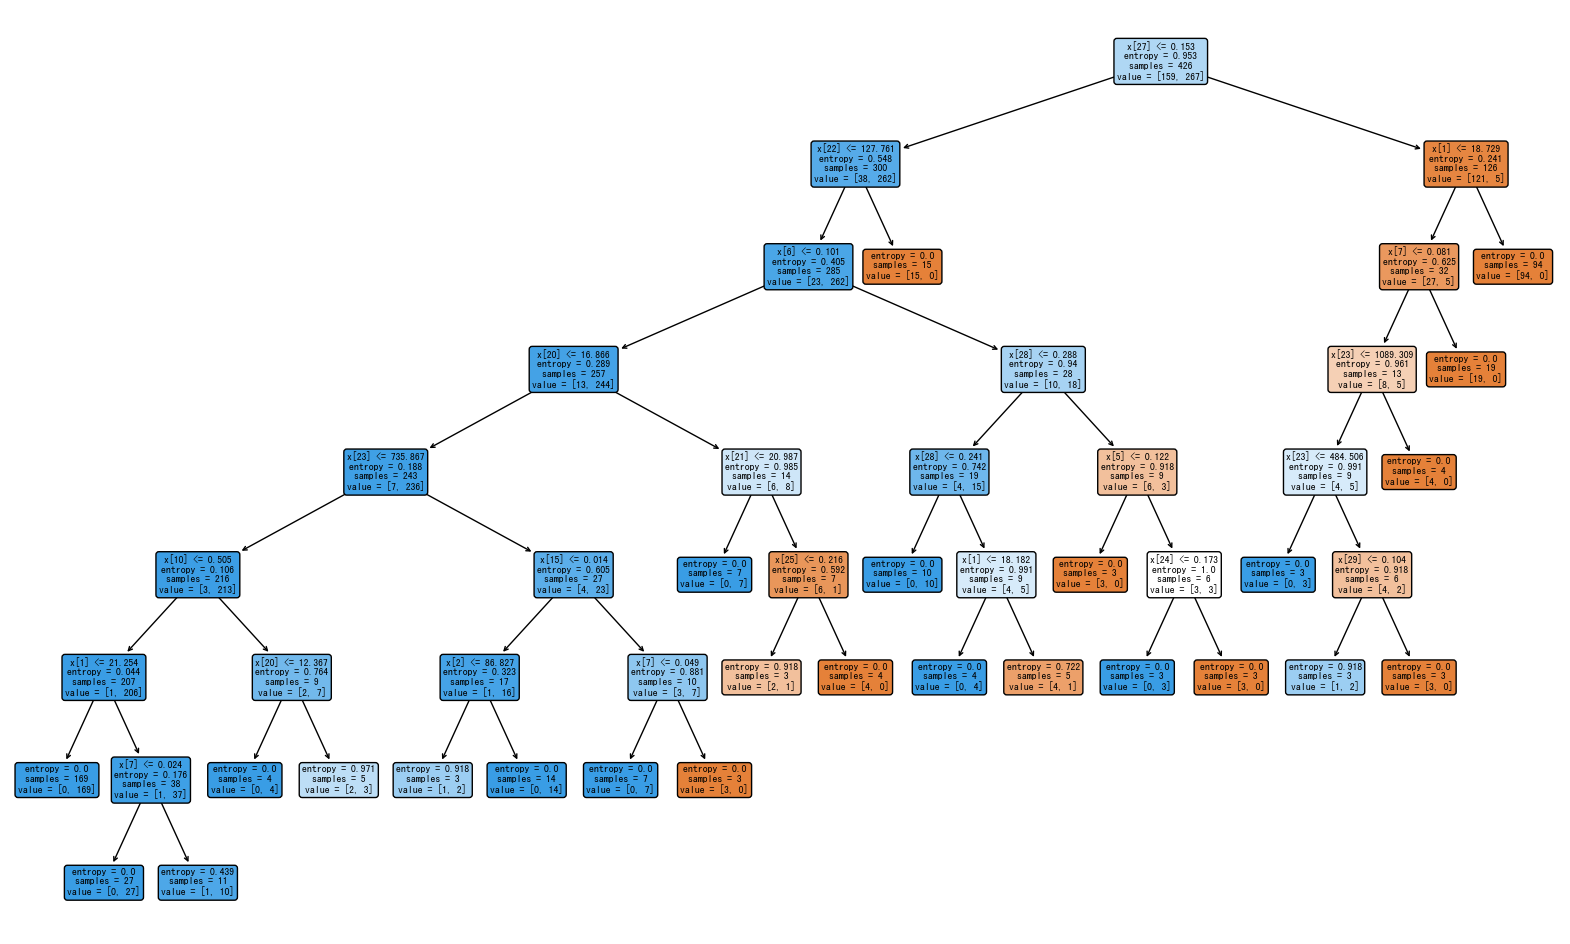

In [69]:
clf=DecisionTreeClassifier( criterion= 'entropy', max_depth= 8, min_samples_leaf= 3, min_samples_split= 2, splitter= 'random')
clf.fit(X_train,y_train)

plt.figure(figsize=(20,12))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [70]:
y_predicted=clf.predict(X_test)
accuracy_score(y_test,y_predicted)



0.9370629370629371